---

<div align="center">

# Copyright and Credit Notice

**Jupyter Lab created by**

**Prof. Hyunglok Kim**

**Hydro AI Lab, GIST, South Korea**

Website: [hydroai.net](http://hydroai.net)

---

**Commercial Use Prohibited**

None of the materials may be used commercially. Please contact me if you plan to modify and use these materials for any educational purpose or research.

---
**Contact Information**

Prof. Hyunglok Kim  
Hydro AI Lab, GIST, South Korea  
Email: [hyunglokkim@gist.ac.kr](mailto:hyunglokkim@gist.ac.kr)

---

</div>

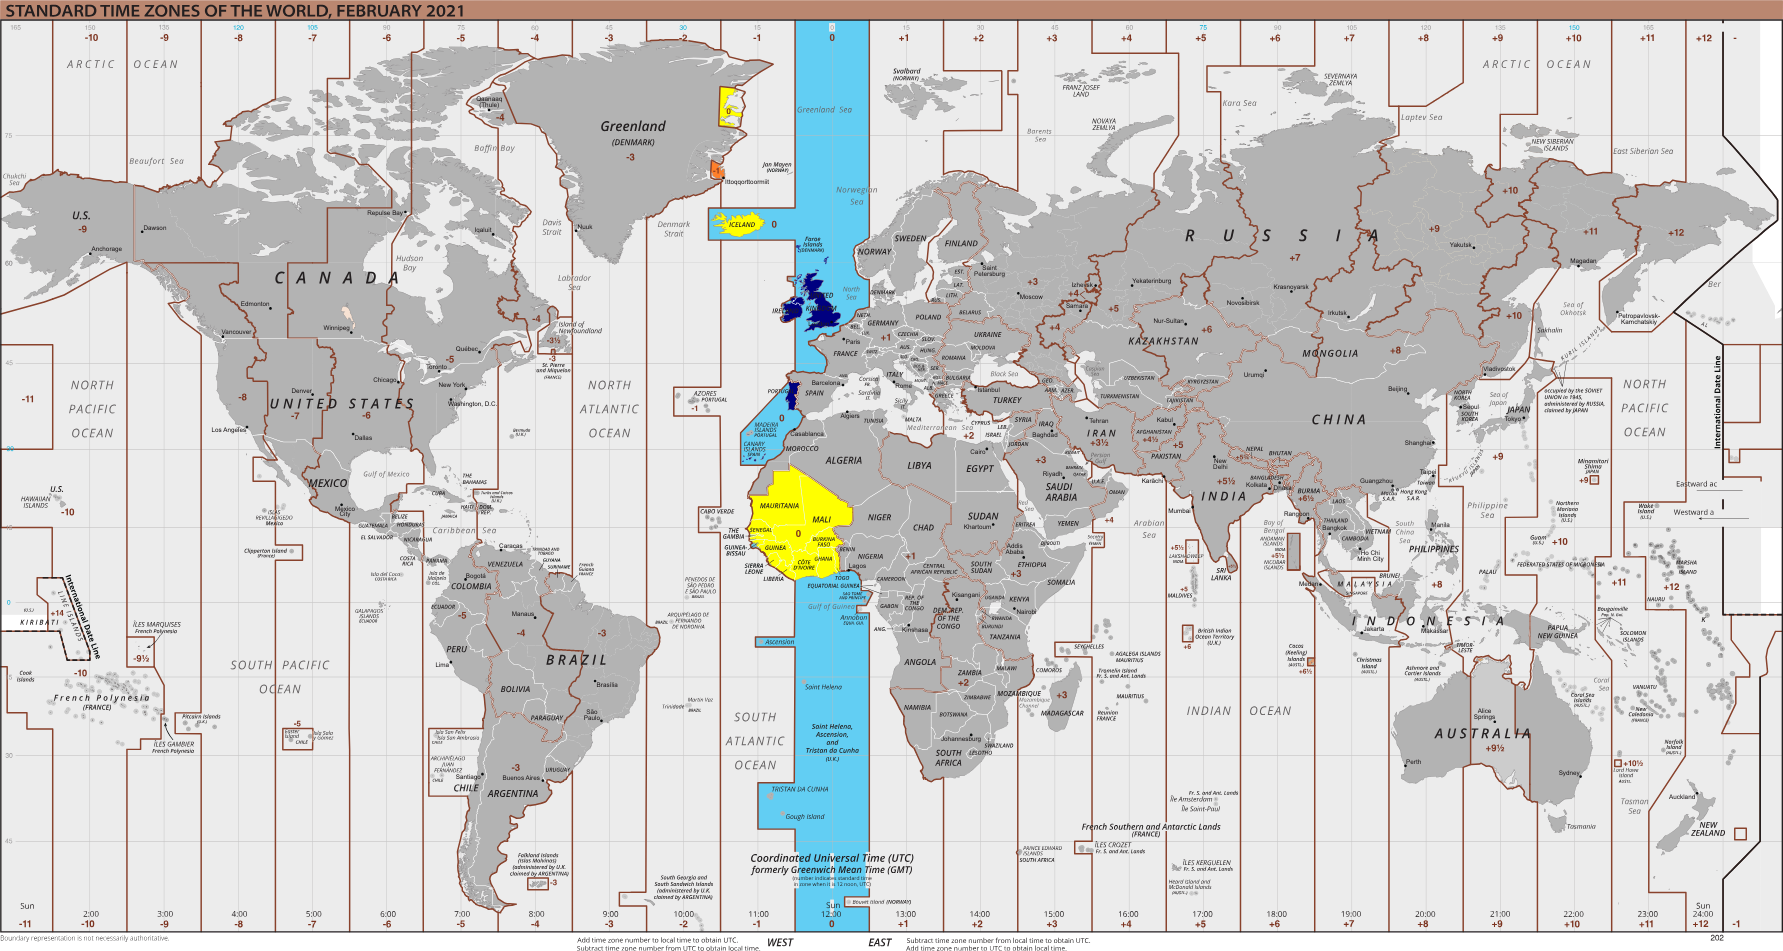![image.png]

# Example: Converting Coordinated Universal Time (UTC) to Local Time (LT) with GLDAS Noah data (3-hourly, 0.25 x 0.25 degree)

This code example demonstrates how to convert data with Coordinated Universal Time (UTC) to a specific Local Time (LT) and select indices where the local time is within a specified range around a target time.

## Steps:

1. **Longitude Grid Data**:
   - A longitude grid ranging from -180 to 180 degrees is created with 1440 points (for 0.25 x 0.25 degree resolution data). This grid represents different longitudes on Earth.

2. **Observed Time**:
   - The observed time is given in minutes since a reference time (`2000-01-01 03:00:00`). This is converted to a `datetime` object for easier manipulation.

3. **Convert Observed Minutes to Datetime**:
   - The observed minutes are added to the reference time to get the exact observed time in `datetime` format.

4. **Calculate Local Time for Each Longitude**:
   - A function `calculate_local_time` is defined to calculate the local time for a given longitude. It considers the time difference based on the longitude (since every 15 degrees of longitude corresponds to 1 hour difference from UTC).

5. **Generate Local Times Array**:
   - An array of local times is created for each longitude in the grid by applying the `calculate_local_time` function.

6. **Define Target Local Time**:
   - The target local time is set (e.g., 6 AM). The goal is to find longitudes where the local time is within ±1 hour of this target time.

7. **Select Indices Based on Local Time**:
   - The indices of longitudes where the local time is within the target time range (±1 hour) are selected using `numpy.where`. The condition checks for the local time to be within this range.

8. **Print Results**:
   - If there are any selected indices, the corresponding longitudes are printed. Otherwise, a message is printed indicating that no longitudes were found within the target time range.

## Key Points:

- **Time Conversion**: The code demonstrates how to convert a given UTC time to local times for different longitudes.
- **Time Range Selection**: It shows how to select specific longitudes based on a target local time and a specified range.
- **Use of NumPy and Datetime**: The code utilizes NumPy for efficient array operations and the `datetime` module for handling time calculations.

This example can be useful in applications where you need to analyze or visualize data based on local times across different geographic regions.


In [28]:
import sys
import os
import platform
import importlib
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive'
    cpuserver_data_FP = '/Users/hyunglokkim/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.Data as hData
import HydroAI.Plot as hPlot
importlib.reload(hData);
importlib.reload(hPlot);

# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## 1) You always first need to check what varibles exist in the data set
# Usage example with GLDAS; get the nc files
year = 2015
target_local_time = 6 # 6 am
target_variable = 'SoilMoi0_10cm_inst'
GLDAS_FP = cpuserver_data_FP + '/GLDAS/Noah/3h'
nc_file_paths = hData.get_file_list(GLDAS_FP, 'nc4') # 1-1) understand what this code does

# check the variable names and their units
_,units,_ = hData.get_nc_variable_names_units(nc_file_paths[0]);

+-----------------------+------------------------------------+-----------------------------------+
| Name                  | Long Name                          | Units                             |
+=======================+====================================+===================================+
| time                  | time                               | minutes since 2000-01-01 03:00:00 |
+-----------------------+------------------------------------+-----------------------------------+
| time_bnds             |                                    |                                   |
+-----------------------+------------------------------------+-----------------------------------+
| lon                   | longitude                          | degrees_east                      |
+-----------------------+------------------------------------+-----------------------------------+
| lat                   | latitude                           | degrees_north                     |
+---------

In [3]:
# 2. Second, always check the data and map it
# 2-1) Load the data (soil moisture, latitude, and longitude)
sm_0_10 = hData.get_variable_from_nc(nc_file_paths[0], target_variable, layer_index=0, flip_data='False')
lat  = np.flipud(hData.get_variable_from_nc(nc_file_paths[0], 'lat', layer_index=0))
lon  = hData.get_variable_from_nc(nc_file_paths[0], 'lon', layer_index=0)
lon, lat = np.meshgrid(lon, lat)

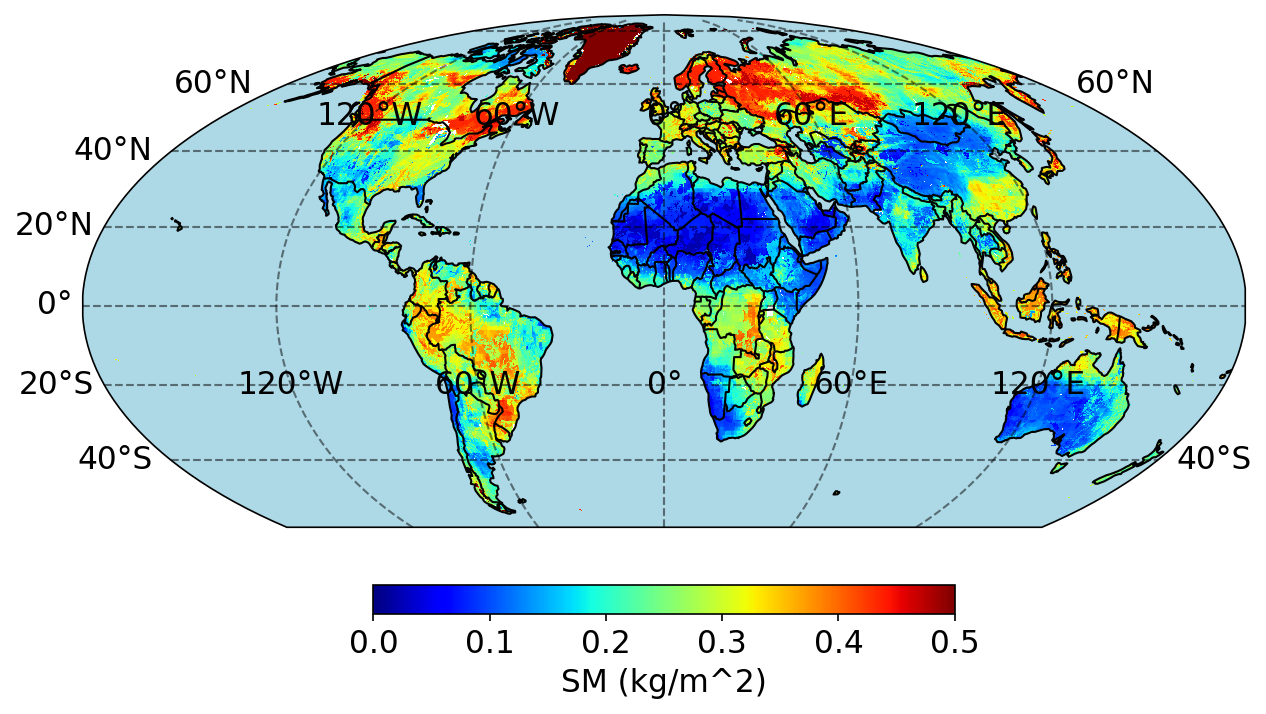

In [4]:
# 2-2) Map the loaded data
hPlot.plot_map(lon, lat, sm_0_10/100, 0, 0.5, plot_title=target_variable, label_title='SM (kg/m^2)', cmap='jet');

In [5]:
reference_time = datetime(2000, 1, 1, 3, 0, 0)
UTC_time = hData.get_variable_from_nc(nc_file_paths[0], 'time', layer_index=0, flip_data='False')
# Convert observed minutes to a datetime object
UTC_time = reference_time + timedelta(minutes=UTC_time[0])
print('The UTC time of the current file is', UTC_time)

The UTC time of the current file is 2015-01-01 00:00:00


In [6]:
# Array to store local times
local_times = np.array([hData.calculate_local_time(UTC_time, lon) for lon in lon[0,:]])
# Select areas where local time is the exact target local time (e.g., 6 AM)
selected_indices = np.where([(lt.hour == target_local_time) for lt in local_times])[0]

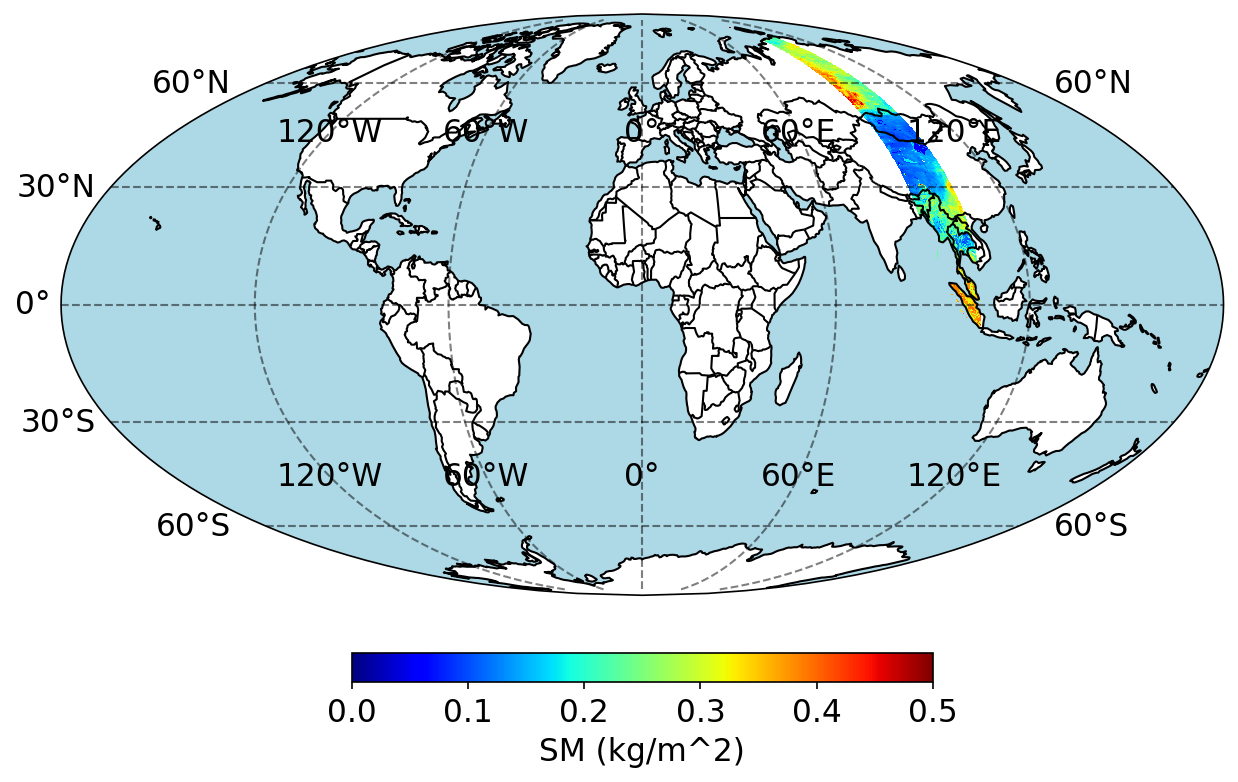

In [7]:
# 2-4) when UTC is given with above UTC_time, the areas where the local time 6:00 - 6:59 is shown below:
hPlot.plot_map(lon[:, selected_indices], lat[:, selected_indices], sm_0_10[:, selected_indices]/100, 0, 0.5, plot_title='soil mositure (0-10 cm)', label_title='SM (kg/m^2)', cmap='jet', bounds='global');

UTC time is  2015-05-29 18:00:00
The areas wehre the local time is  6  +-1


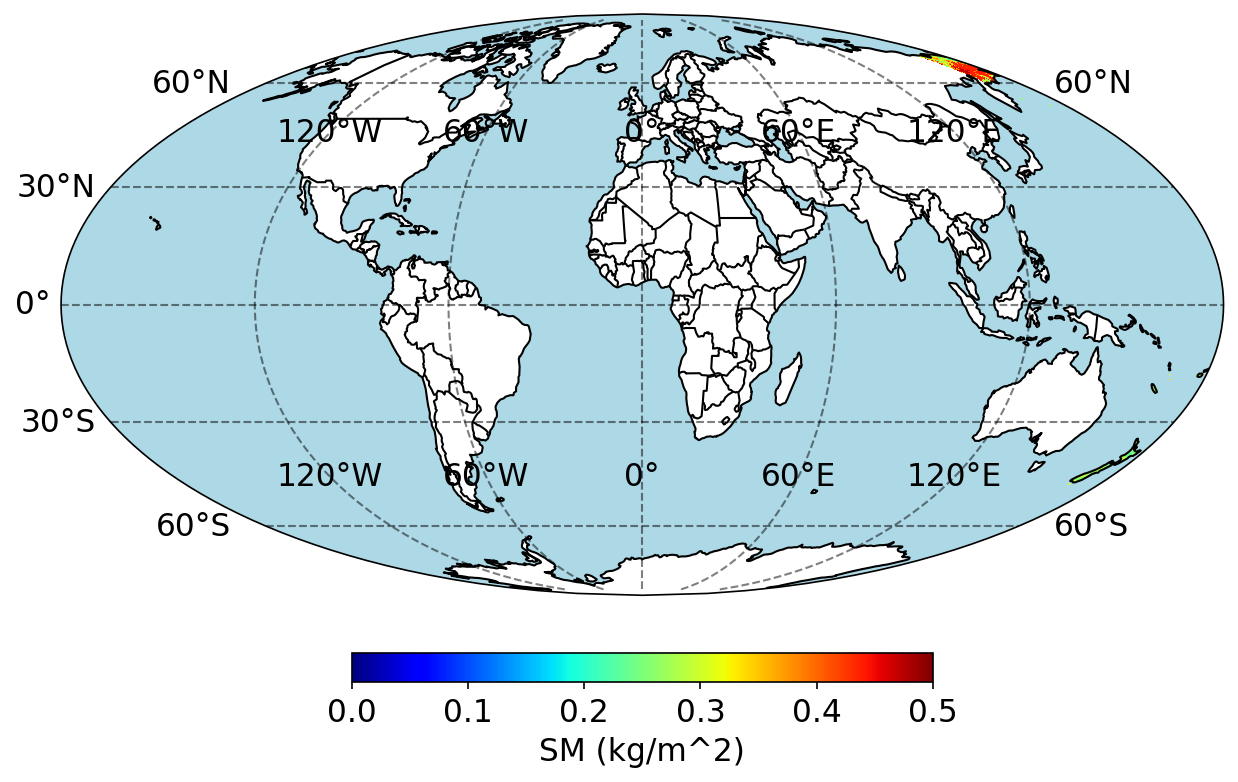

UTC time is  2015-05-29 21:00:00
The areas wehre the local time is  6  +-1


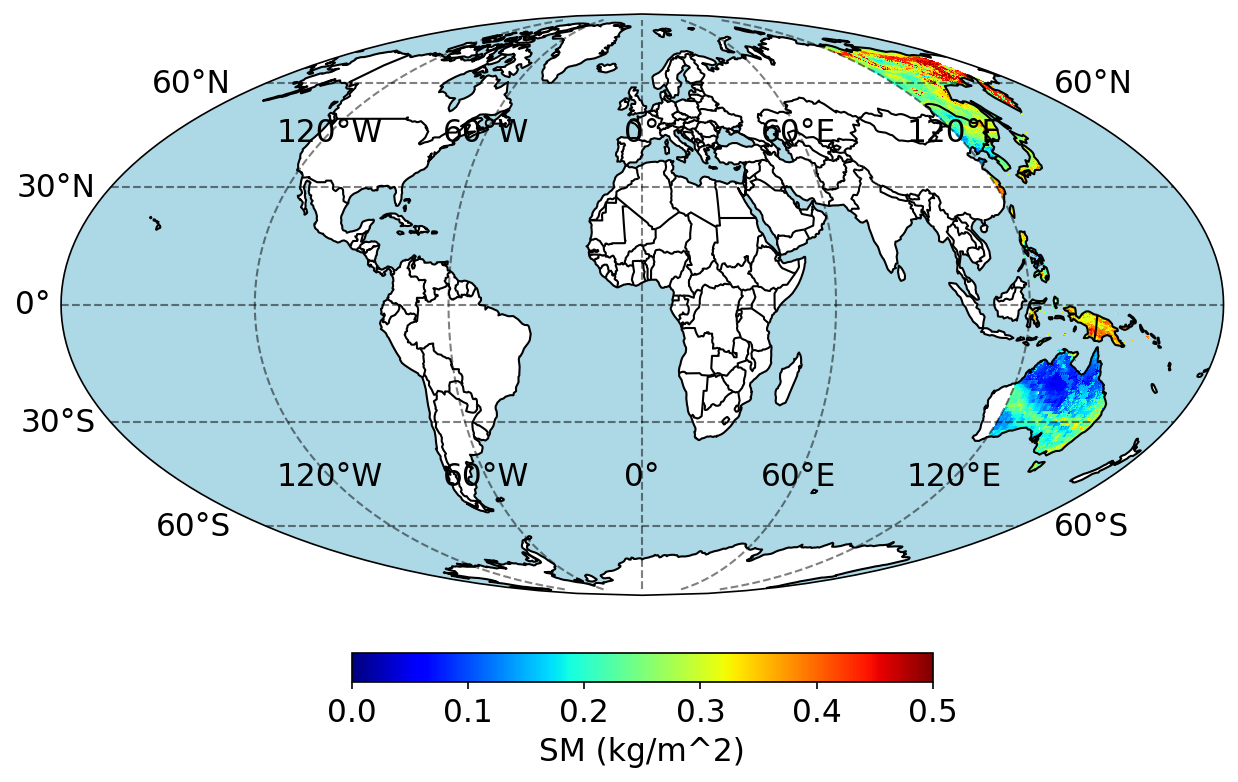

UTC time is  2015-05-30 00:00:00
The areas wehre the local time is  6  +-1


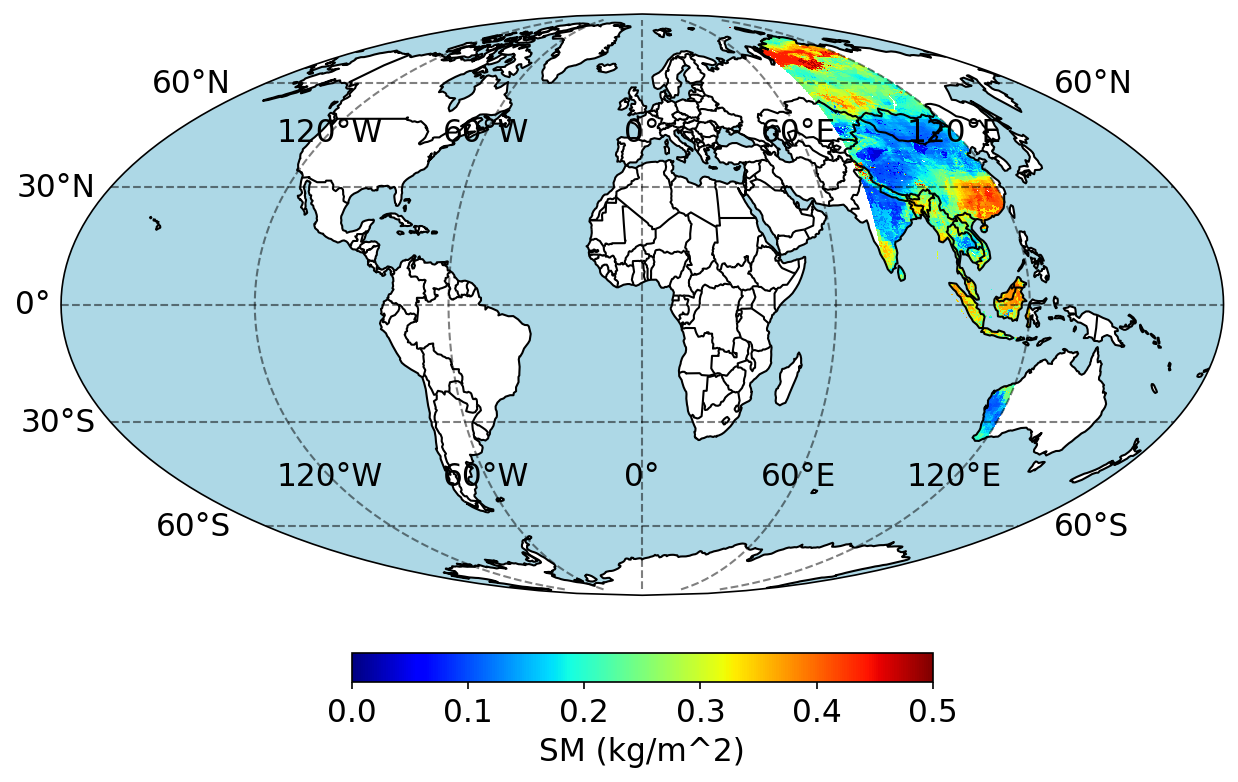

UTC time is  2015-05-30 03:00:00
The areas wehre the local time is  6  +-1


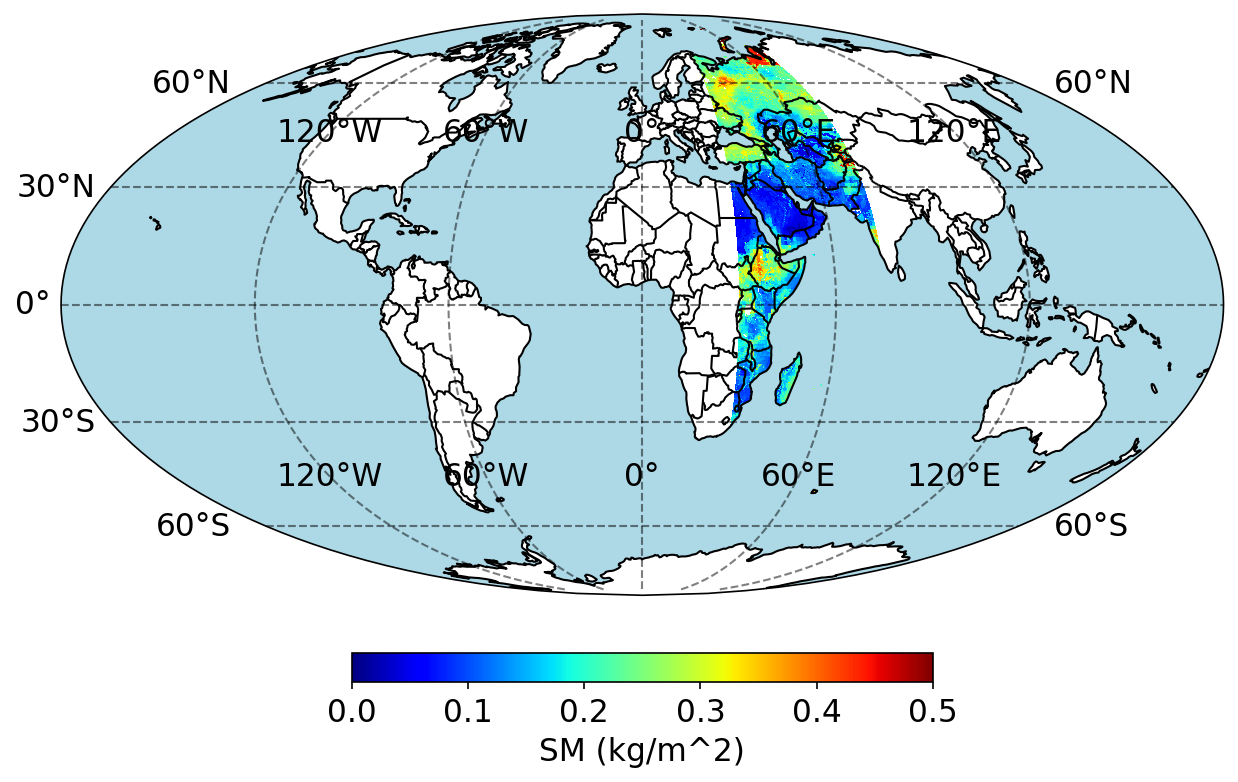

UTC time is  2015-05-30 06:00:00
The areas wehre the local time is  6  +-1


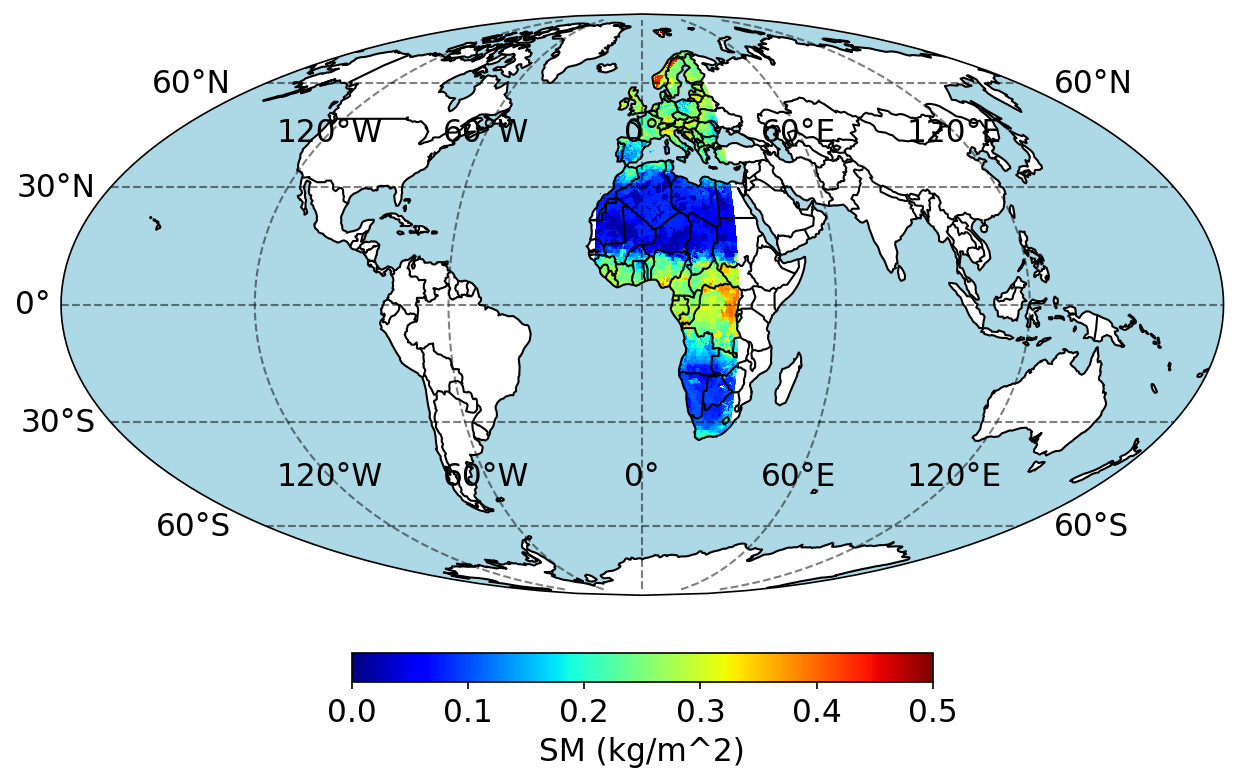

UTC time is  2015-05-30 09:00:00
The areas wehre the local time is  6  +-1


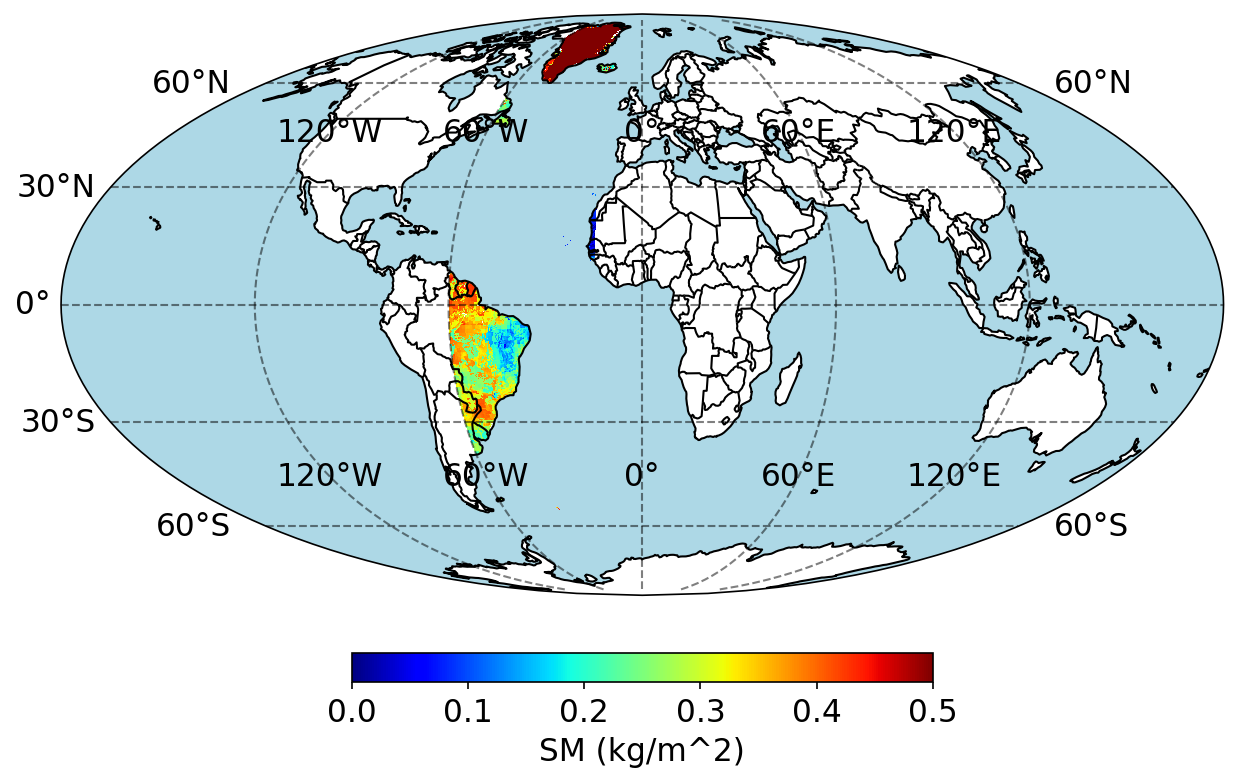

UTC time is  2015-05-30 12:00:00
The areas wehre the local time is  6  +-1


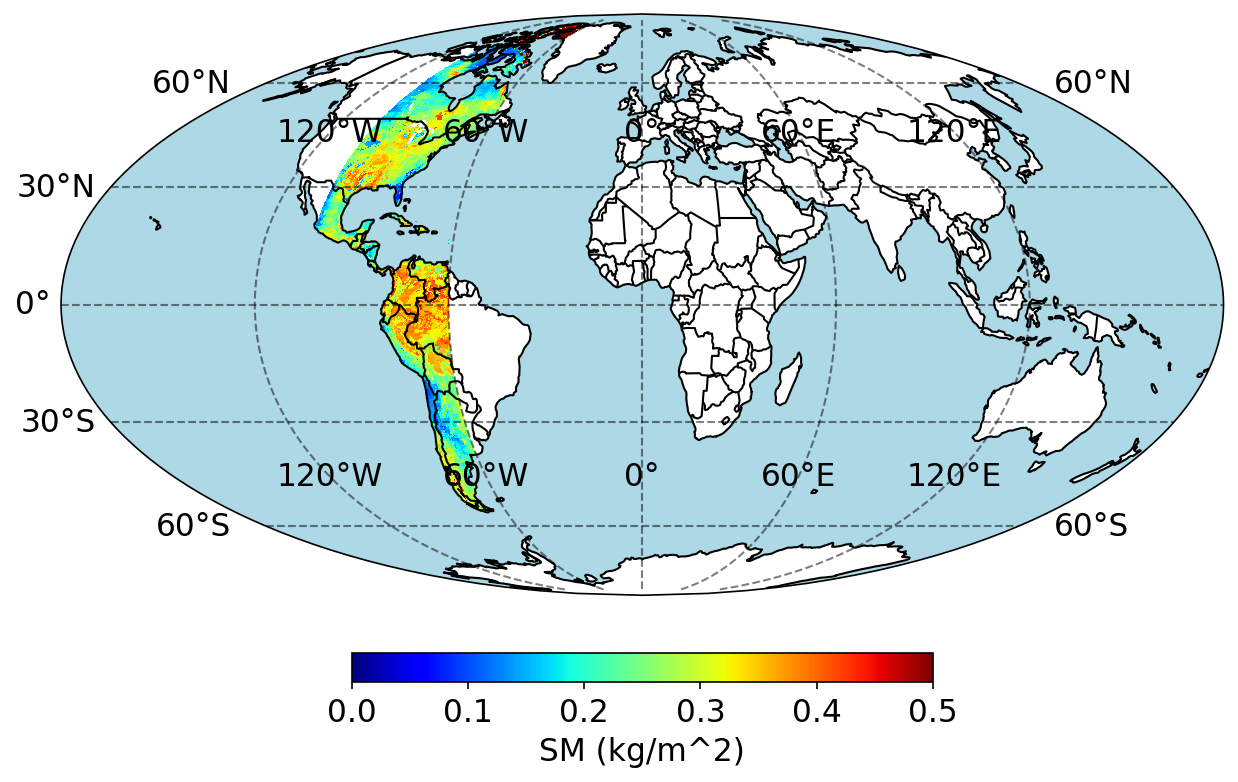

UTC time is  2015-05-30 15:00:00
The areas wehre the local time is  6  +-1


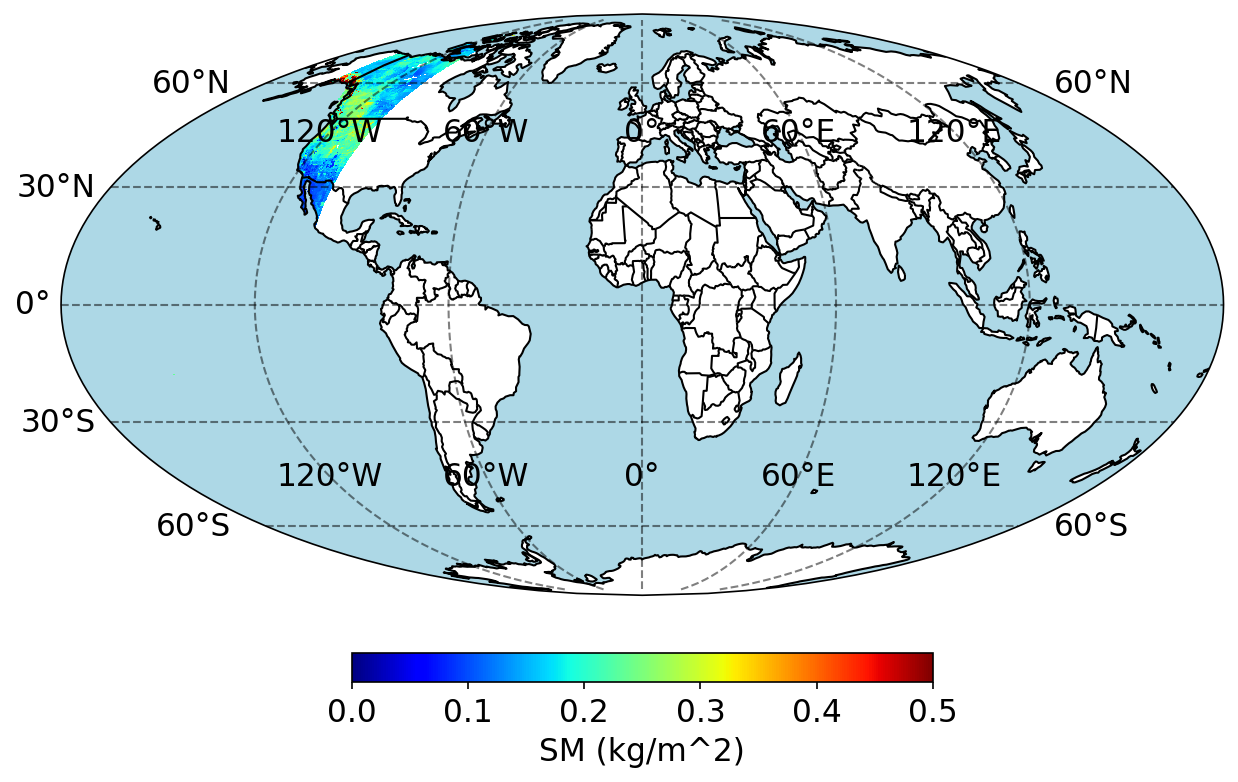

UTC time is  2015-05-30 18:00:00
The areas wehre the local time is  6  +-1


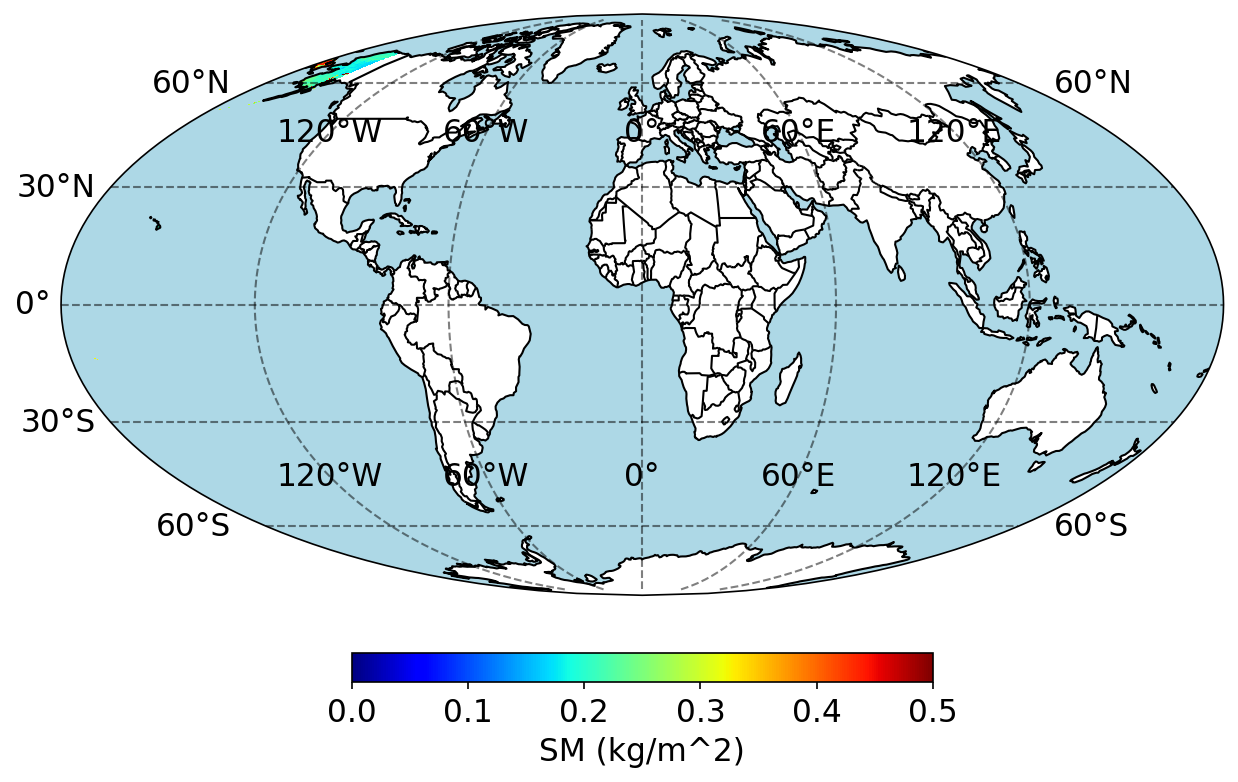

In [9]:
# 2-3) scan all the nc files that include target doy and local time
reference_time = datetime(2000, 1, 1, 3, 0, 0)
t_doy = 150
t_nc_file_paths = hData.get_file_list(GLDAS_FP, 'nc4', filter_strs=[hData.doy_to_yearyyyymmdd(year, t_doy-1), hData.doy_to_yearyyyymmdd(year, t_doy), hData.doy_to_yearyyyymmdd(year, t_doy+1)]) 
for i in t_nc_file_paths:
    t_sm_0_10 = hData.get_variable_from_nc(i, 'SoilMoi0_10cm_inst', layer_index=0, flip_data='False')
    t_UTC_time = hData.get_variable_from_nc(i, 'time', layer_index=0, flip_data='False')
    # Convert observed minutes to a datetime object
    t_UTC_time = reference_time + timedelta(minutes=t_UTC_time[0])
    t_local_times = np.array([hData.calculate_local_time(t_UTC_time, lon) for lon in lon[0,:]])
    
    # Select areas where local time is the exact target local time (e.g., 6 AM)
    #t_selected_indices = np.where([(lt.year == year) & 
    #                               (lt.month == int(hData.doy_to_yearyyyymmdd(year, t_doy)[4:6])) &
    #                               (lt.day == int(hData.doy_to_yearyyyymmdd(year, t_doy)[6:8])) &
    #                               (lt.hour == target_local_time) for lt in t_local_times])[0]

    # Select areas where local time is the target local time +-1 hour (e.g., 6 AM)
    t_selected_indices = np.where([(lt.year == year) & 
                                   (lt.month == int(hData.doy_to_yearyyyymmdd(year, t_doy)[4:6])) &
                                   (lt.day == int(hData.doy_to_yearyyyymmdd(year, t_doy)[6:8])) &
                                   (target_local_time - 1 <= lt.hour <= target_local_time + 1) for lt in t_local_times])[0]
    if t_selected_indices.size>0:
        print('UTC time is ', t_UTC_time)
        print('The areas wehre the local time is ', target_local_time, ' +-1')
        hPlot.plot_map(lon[:, t_selected_indices], lat[:, t_selected_indices], t_sm_0_10[:, t_selected_indices]/100, 0, 0.5, plot_title='soil mositure (0-10 cm)', label_title='SM (kg/m^2)', cmap='jet', bounds='global');

20150530 at  6  +-1 local time.


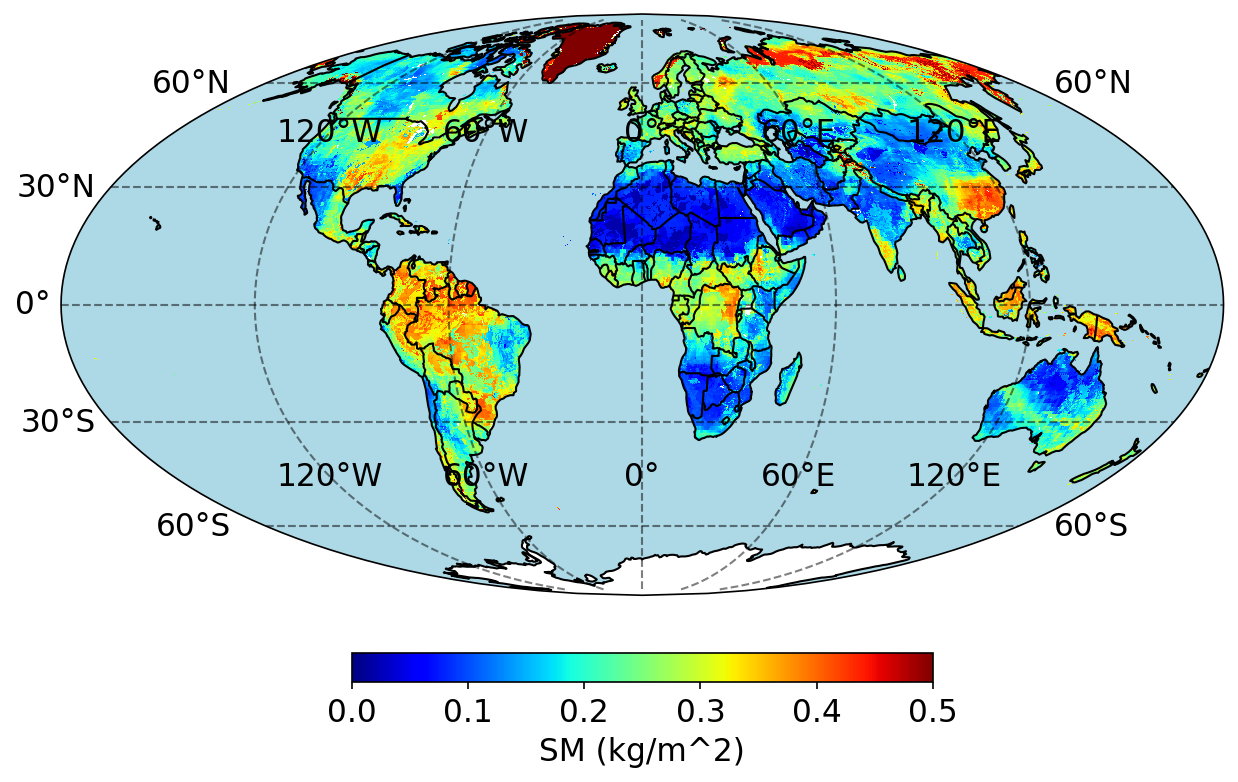

In [11]:
# 2-4) Combined the areas where target doy and time exist
reference_time = datetime(2000, 1, 1, 3, 0, 0)
t_doy = 150
t_nc_file_paths = hData.get_file_list(GLDAS_FP, 'nc4', filter_strs=[hData.doy_to_yearyyyymmdd(year, t_doy-1), hData.doy_to_yearyyyymmdd(year, t_doy), hData.doy_to_yearyyyymmdd(year, t_doy+1)])
t_sm_0_10_LT_combined = np.full((lat.shape), np.nan)

for i in t_nc_file_paths:
    t_sm_0_10 = hData.get_variable_from_nc(i, 'SoilMoi0_10cm_inst', layer_index=0, flip_data='False')
    t_UTC_time = hData.get_variable_from_nc(i, 'time', layer_index=0, flip_data='False')
    # Convert observed minutes to a datetime object
    t_UTC_time = reference_time + timedelta(minutes=t_UTC_time[0])
    t_local_times = np.array([hData.calculate_local_time(t_UTC_time, lon) for lon in lon[0,:]])
    
    # Select areas where local time is target local time +-1 (e.g., 6 AM)
    t_selected_indices = np.where([(lt.year == year) & 
                                   (lt.month == int(hData.doy_to_yearyyyymmdd(year, t_doy)[4:6])) &
                                   (lt.day == int(hData.doy_to_yearyyyymmdd(year, t_doy)[6:8])) &
                                   (target_local_time - 1 <= lt.hour <= target_local_time + 1) for lt in t_local_times])[0]

    if t_selected_indices.size>0:
        t_sm_0_10_LT_combined[:, t_selected_indices] = t_sm_0_10[:, t_selected_indices]

print(hData.doy_to_yearyyyymmdd(year, t_doy), 'at ', target_local_time ,' +-1 local time.')
hPlot.plot_map(lon, lat, t_sm_0_10_LT_combined/100, 0, 0.5, plot_title='soil mositure (0-10 cm)', label_title='SM (kg/m^2)', cmap='jet', bounds='global');

Processing files: 100%|███████████████████████| 24/24 [00:01<00:00, 13.58file/s]


20150530 at  6 +- 1 local time.


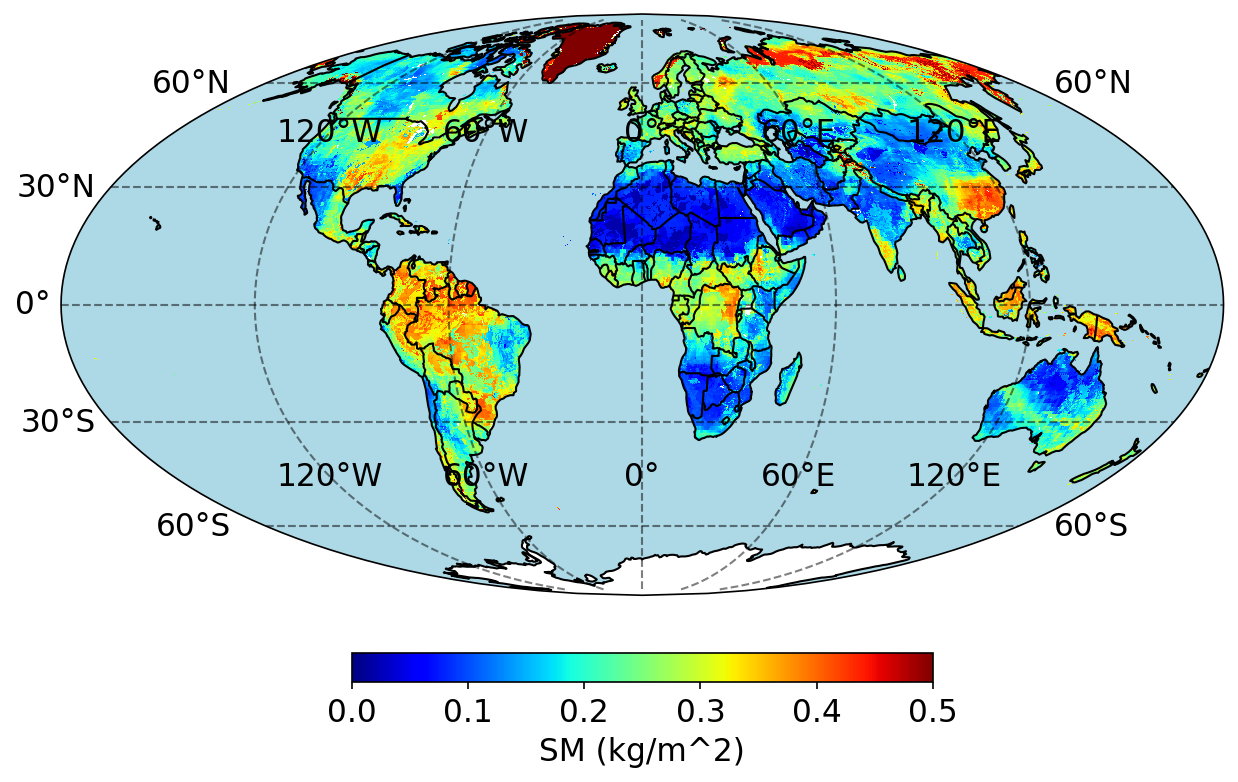

In [16]:
# 2-5) Create an unit function
def UTC_to_LT(data_FP, target_local_time, lon, year, doy, var_name, layer_index=0, time_interval=1, reference_time = datetime(2000, 1, 1, 3, 0, 0)):
    
    t_nc_file_paths = hData.get_file_list(data_FP, 'nc4', filter_strs=[hData.doy_to_yearyyyymmdd(year, doy-1), hData.doy_to_yearyyyymmdd(year, doy), hData.doy_to_yearyyyymmdd(year, doy+1)])
    t_var_LT_combined = np.full((lon.shape), np.nan)
    
    for i in tqdm(t_nc_file_paths, desc='Processing files', unit='file'):
        t_var = hData.get_variable_from_nc(i, var_name, layer_index=layer_index, flip_data='False')
        t_UTC_time = hData.get_variable_from_nc(i, 'time', layer_index=0, flip_data='False')
        
        # Convert observed minutes to a datetime object
        t_UTC_time = reference_time + timedelta(minutes=t_UTC_time[0])
        t_local_times = np.array([hData.calculate_local_time(t_UTC_time, lon) for lon in lon[0,:]])
        
        # Select areas where local time is target local time +-1 (e.g., 6 AM)
        t_selected_indices = np.where([(lt.year == year) & 
                                       (lt.month == int(hData.doy_to_yearyyyymmdd(year, doy)[4:6])) &
                                       (lt.day == int(hData.doy_to_yearyyyymmdd(year, doy)[6:8])) &
                                       (target_local_time - time_interval <= lt.hour <= target_local_time + time_interval) for lt in t_local_times])[0]
    
        if t_selected_indices.size>0:
            t_var_LT_combined[:, t_selected_indices] = t_var[:, t_selected_indices]
    print(hData.doy_to_yearyyyymmdd(year, doy), 'at ', target_local_time ,'+-', str(time_interval),'local time.')

    return t_var_LT_combined

year = 2015
doy = 150
t_var_LT_combined=UTC_to_LT(GLDAS_FP, target_local_time, lon, year, doy, 'SoilMoi0_10cm_inst')
hPlot.plot_map(lon, lat, t_var_LT_combined/100, 0, 0.5, plot_title='soil mositure (0-10 cm)', label_title='SM (kg/m^2)', cmap='jet', bounds='global');

Processing files: 100%|███████████████████████| 24/24 [00:01<00:00, 14.52file/s]


20150530 at  6 +- 1 local time.


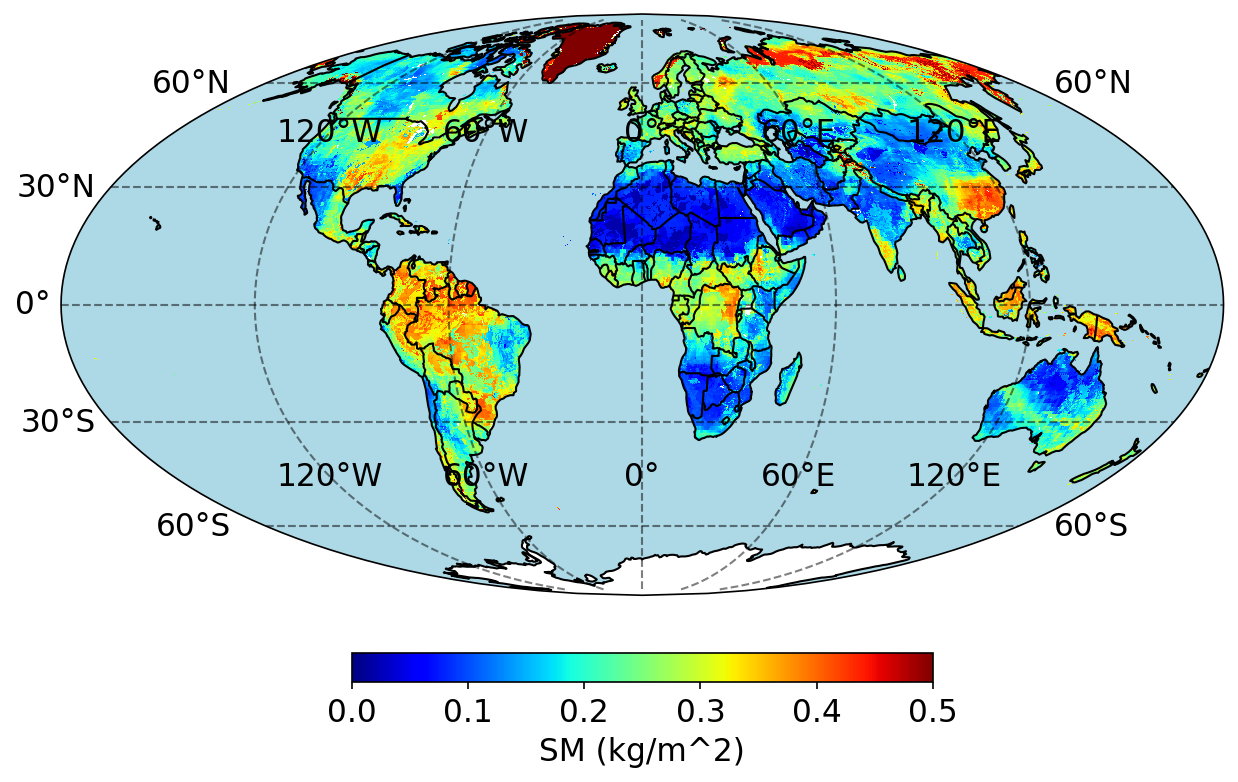

In [18]:
# 3. HydroAI Library implementation
doy = 150
t_var_LT_combined = hData.UTC_to_LT(GLDAS_FP, target_local_time, lon, year, doy, target_variable)
hPlot.plot_map(lon, lat, t_var_LT_combined/100, 0, 0.5, plot_title='soil mositure (0-10 cm)', label_title='SM (kg/m^2)', cmap='jet', bounds='global');

In [ ]:
# 4. Create the yearly target_local_time nc file (non-parallel)
nc_save_fp = cpuserver_data_FP + '/GLDAS/Noah/local_time/'
GLDAS_FP = cpuserver_data_FP + '/GLDAS/Noah/3h'
nc_file_paths = hData.get_file_list(GLDAS_FP, 'nc4') # 1-1) understand what this code does

target_local_time = 6 # 6 am
target_variable   = 'SoilMoi0_10cm_inst'
lat  = np.flipud(hData.get_variable_from_nc(nc_file_paths[0], 'lat', layer_index=0))
lon  = hData.get_variable_from_nc(nc_file_paths[0], 'lon', layer_index=0)
lon, lat = np.meshgrid(lon, lat)

for year in range(2015, 2016):#, 2024):
    
    n_of_days= hData.days_in_year(year)
    SM_0_10  = np.full((lat.shape[0], lat.shape[1], n_of_days+1), np.nan)
    
    for doy in range(1, 3):#n_of_days+1):
        t_var_LT_combined = hData.UTC_to_LT(GLDAS_FP, target_local_time, lon, year, doy, target_variable)
        SM_0_10[:,:,doy]  = t_var_LT_combined/100
    
    nc_file_name = nc_save_fp + 'test_GLDAS_Noah_'+str(year)+'_LT_'+str(target_local_time)+'.nc'
    
    data_vars = {}
    data_vars[f'{target_variable}'] = SM_0_10
    
    print(f"Saving: {nc_file_name}")
    hData.create_netcdf_file(
        nc_file    = nc_file_name,
        latitude   = lat,
        longitude  = lon,
        **data_vars)
    print(f"NetCDF file created: {nc_file_name}")

20150102 at 6±1 local time: 100%|█████████████| 24/24 [00:02<00:00, 11.69file/s]


Saving: /Users/hyunglokkim/cpuserver_data/GLDAS/Noah/local_time/test_GLDAS_Noah_2015_LT_6.nc


In [ ]:
# 5. Create the yearly target_local_time nc file (parallel; only working with Linux)
def process_doy_chunk(doy_start, doy_end, GLDAS_FP, target_local_time, lon, lat, year, target_variable):
    var_chunk = np.full((lat.shape[0], lat.shape[1], doy_end - doy_start + 1), np.nan)
    for i, doy in enumerate(range(doy_start, doy_end + 1)):
        t_var_LT_combined = hData.UTC_to_LT(GLDAS_FP, target_local_time, lon, year, doy, target_variable)
        var_chunk[:, :, i] = t_var_LT_combined / 100
    return doy_start, doy_end, var_chunk

def run_parallel_processing(GLDAS_FP, target_local_time, lon, lat, year, target_variable, chunk_size, n_of_days, nc_save_fp):
    var = np.full((lat.shape[0], lat.shape[1], n_of_days + 1), np.nan)  # +1 to leave the first slice as NaN

    with mp.Pool() as pool:
        results = []
        for doy_start in range(1, n_of_days + 1, chunk_size):
            doy_end = min(doy_start + chunk_size - 1, n_of_days)
            results.append(pool.apply_async(process_doy_chunk, (doy_start, doy_end, GLDAS_FP, target_local_time, lon, lat, year, target_variable)))

        # Ensure all processes are completed and collected before proceeding
        for result in results:
            doy_start, doy_end, var_chunk = result.get()
            print('[['+str(doy_start)+']]')
            var[:, :, doy_start:doy_end + 1] = var_chunk

    nc_file_name = nc_save_fp + 'GLDAS_Noah_' + str(year) + '_LT_' + str(target_local_time) + '.nc'

    data_vars = {}
    data_vars[f'{target_variable}'] = var

    print(f"Saving: {nc_file_name}")
    hData.create_netcdf_file(
        nc_file=nc_file_name,
        latitude=lat,
        longitude=lon,
        **data_vars)

if __name__ == "__main__":
    GLDAS_FP = cpuserver_data_FP + '/GLDAS/Noah/3h'
    nc_save_fp = cpuserver_data_FP + '/GLDAS/Noah/local_time/'
    nc_file_paths = hData.get_file_list(GLDAS_FP, 'nc4')

    year = 2015  # Specify the year as needed
    target_local_time = 6
    target_variable = 'SoilMoi0_10cm_inst'
    lat = np.flipud(hData.get_variable_from_nc(nc_file_paths[0], 'lat', layer_index=0))
    lon = hData.get_variable_from_nc(nc_file_paths[0], 'lon', layer_index=0)
    lon, lat = np.meshgrid(lon, lat)
    n_of_days = hData.days_in_year(year)

    chunk_size = 10  # Specify how many days to process at the same time

    run_parallel_processing(GLDAS_FP, target_local_time, lon, lat, year, target_variable, chunk_size, n_of_days, nc_save_fp)
